## Модели классификации для нескольких классов

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). Требуется на основе этого набора данных, построить различные модели многоклассовой классификации, оценивающие каждый из трех видов растения по данным проведенных измерений.

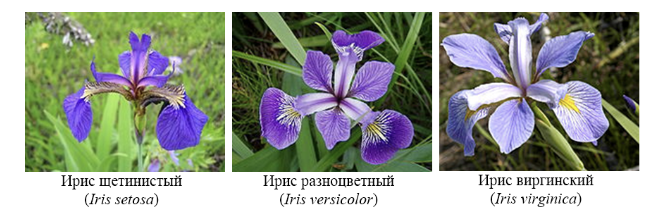

Импортируем необходимые библиотеки:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [9]:

print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [11]:
type(iris)

sklearn.utils._bunch.Bunch

Объект Bunch — это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [14]:
iris_df = pd.DataFrame(iris.data)

In [15]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [18]:
iris_df.shape

(150, 6)

In [19]:
# информация о наборе данных
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   name               150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [20]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [26]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [30]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Описательная статистика

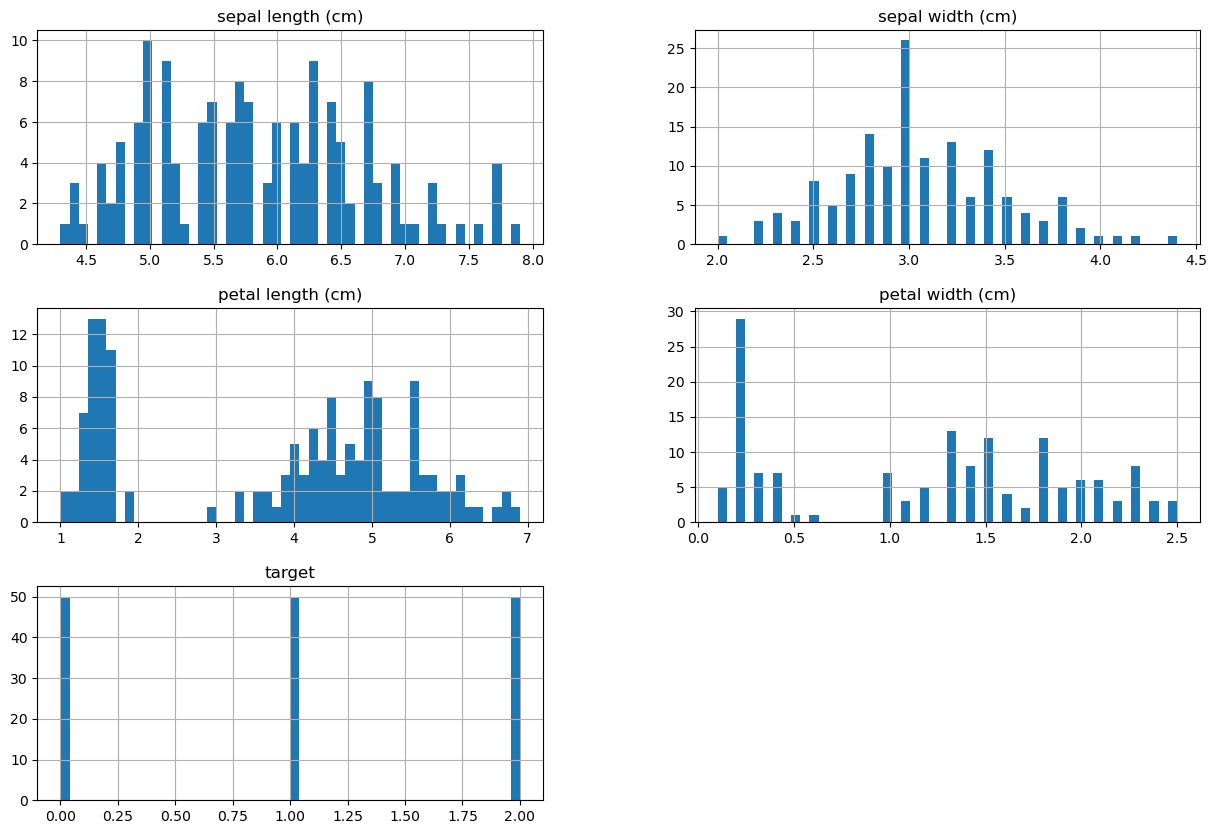

In [37]:
iris_df.hist(figsize = (15,10), bins = 50);
plt.show()

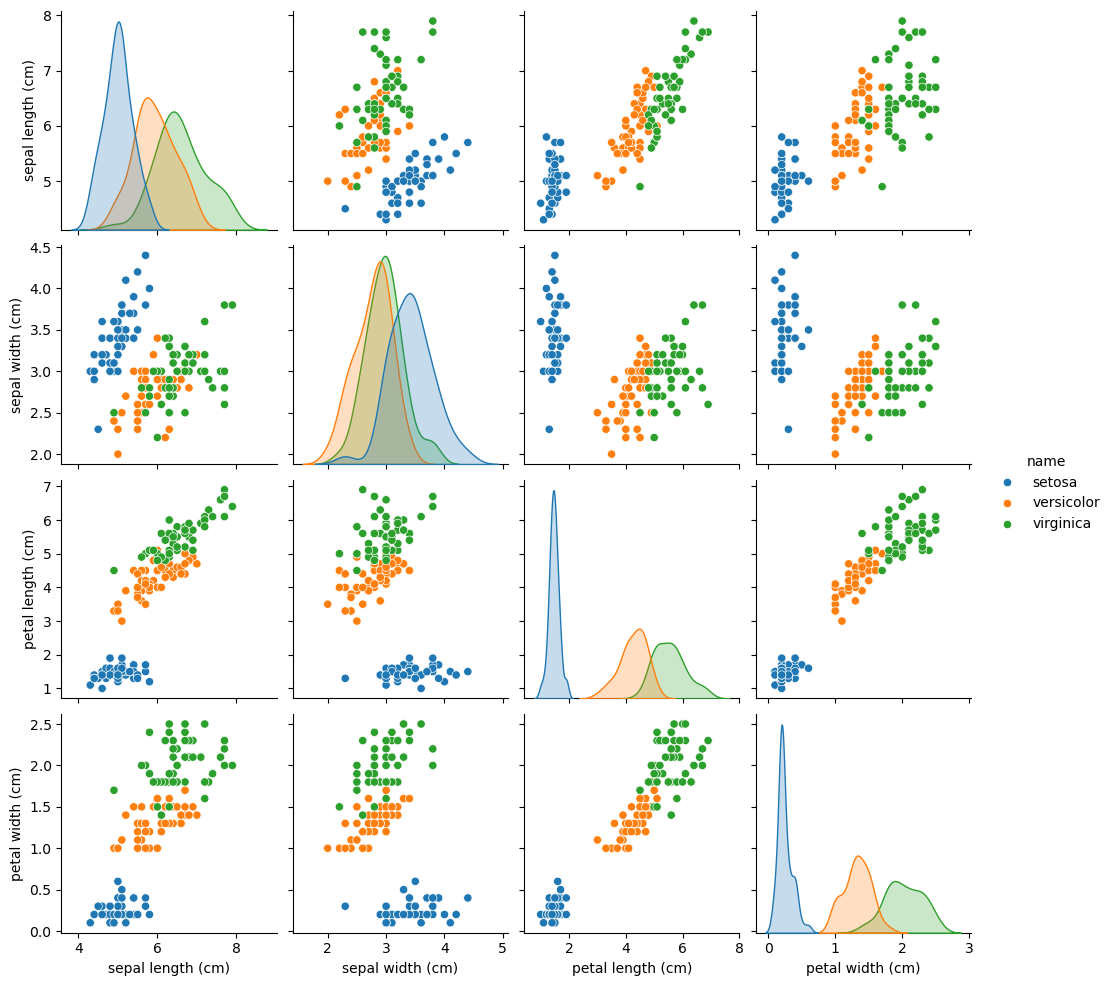

In [39]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')
plt.show()

Видно, что «petal width (cm)» и «petal length (cm)» имеют сильную зависимость — точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы достаточно компактно. А вот, например, с помощью переменных «sepal width (cm)» и «sepal length (cm)» качественную классификацию не построить, т.к. точки, относящиеся к сортам Versicolor и Virginica, перемешаны между собой.

In [41]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

In [42]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [44]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

<Axes: >

Действительно видим, что между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

### Обучение классификатора

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
                                                      iris_df['target'], 
                                                      test_size=0.3, 
                                                      random_state=19)

In [49]:
%time
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(4,), activation='relu', name='input'),
    tf.keras.layers.Dense(10, activation='relu', name='hidden'),
    tf.keras.layers.Dense(3, activation='softmax', name='output'),
])


CPU times: total: 0 ns
Wall time: 0 ns


In [50]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [52]:
%%time
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

CPU times: total: 15.6 ms
Wall time: 256 ms


In [55]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [63]:
%%time
History = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test),callbacks = [early_stop])

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.3429 - loss: 1.7063 - val_accuracy: 0.3111 - val_loss: 1.6822
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3429 - loss: 1.5778 - val_accuracy: 0.3111 - val_loss: 1.5791
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3429 - loss: 1.4880 - val_accuracy: 0.3111 - val_loss: 1.4933
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3429 - loss: 1.4069 - val_accuracy: 0.3111 - val_loss: 1.4099
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3429 - loss: 1.3235 - val_accuracy: 0.3111 - val_loss: 1.3287
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3429 - loss: 1.2491 - val_accuracy: 0.3111 - val_loss: 1.2509
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4286 - loss: 1.1805 - val_accuracy: 0.5778 - val_loss: 1.1845
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6476 - loss: 1.1201 - val_accuracy: 0.6444 - val_loss:

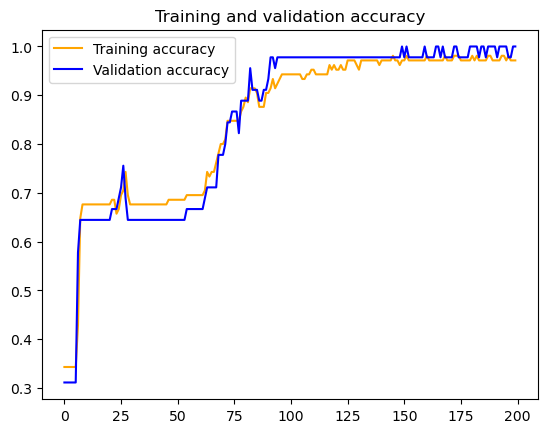

<Figure size 640x480 with 0 Axes>

In [67]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [69]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model accuracy on test data: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.1068
Model accuracy on test data: 100.00%


In [81]:

X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]


In [83]:
%%time

predictions = model.predict(X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
CPU times: total: 203 ms
Wall time: 182 ms


In [85]:
predictions

array([[9.99794662e-01, 9.60811085e-05, 1.09306842e-04],
       [9.99451697e-01, 2.77465821e-04, 2.70834978e-04],
       [9.99559343e-01, 2.17444438e-04, 2.23210664e-04],
       [9.98795748e-01, 6.73756469e-04, 5.30442921e-04],
       [9.99781311e-01, 1.03766841e-04, 1.14872804e-04],
       [9.99522328e-01, 2.66465038e-04, 2.11231891e-04],
       [9.99097824e-01, 4.97234345e-04, 4.04903229e-04],
       [9.99606073e-01, 2.00114708e-04, 1.93924163e-04],
       [9.98420358e-01, 8.86127644e-04, 6.93489215e-04],
       [9.99525905e-01, 2.39487199e-04, 2.34568361e-04],
       [9.99869823e-01, 5.94043850e-05, 7.08578445e-05],
       [9.99188483e-01, 4.50036954e-04, 3.61487153e-04],
       [9.99504447e-01, 2.47640273e-04, 2.48000462e-04],
       [9.99533534e-01, 2.20803806e-04, 2.45732954e-04],
       [9.99976158e-01, 8.64316189e-06, 1.51495333e-05],
       [9.99925852e-01, 3.38746177e-05, 4.02367768e-05],
       [9.99880314e-01, 5.42929083e-05, 6.54874384e-05],
       [9.99686360e-01, 1.55625

In [87]:
test = np.argmax(predictions,axis=1)
prediction = test.flatten()

In [89]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [91]:
from sklearn.metrics import classification_report
y = iris_df['target']
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [148]:
from sklearn.metrics import accuracy_score
print('test accuracy: ', accuracy_score(y, prediction, normalize=True))
f_nn_acc = accuracy_score(y, prediction, normalize=True)


test accuracy:  0.98


В случае предсказания на полном датасете модель проявляет точность 0.98, при равномерном распределении целвой переменной

Предскажем на тестовой выборке

In [71]:
%%time
predictions1 = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
CPU times: total: 281 ms
Wall time: 302 ms


In [73]:
test = np.argmax(predictions1,axis=1)
prediction1 = test.flatten()

In [79]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [96]:
print('test accuracy: ', accuracy_score(y_test, prediction1, normalize=True))

test accuracy:  1.0


In [98]:
nn_accuracy = accuracy_score(y_test, prediction1, normalize=True)

В случае предсказания на тестовой выборке точность - 1.0 

## SVC

In [101]:
from sklearn.svm import SVC

In [103]:
%%time
svc = SVC(random_state=0, gamma = "auto")
svc.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 7.36 ms


SVC(gamma='auto', random_state=0)

In [105]:
%%time
svc_predict = svc.predict(X_test)

CPU times: total: 0 ns
Wall time: 3.99 ms


In [107]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        16
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [109]:
svc_accuracy = accuracy_score(y_test, svc_predict, normalize=True)

In [115]:
print('test accuracy: ', svc_accuracy)

test accuracy:  0.9777777777777777


При предсказании на тестовой выборке модели векторов точность - 0.98, классы 0 и 2 угадываются полностью

Рассмотрим работу модели на полной выборке

In [111]:
%%time
svc_predict1 = svc.predict(X)

CPU times: total: 0 ns
Wall time: 3 ms


In [113]:
print(classification_report(y, svc_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



Точность модели на полной выборке чуть ниже чем на тестовой

In [119]:
print('test accuracy: ', accuracy_score(y, svc_predict1, normalize=True))

test accuracy:  0.9733333333333334


In [146]:
f_svc_acc = accuracy_score(y, svc_predict1, normalize=True)

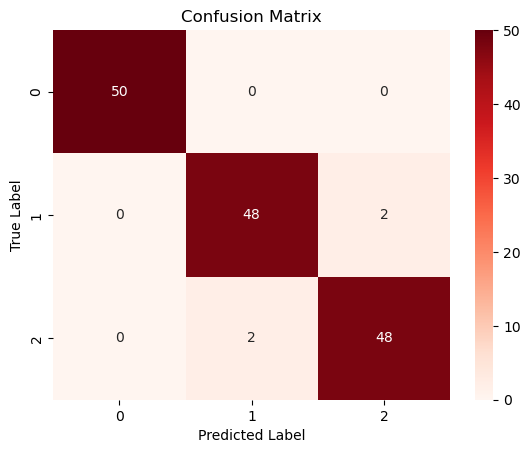

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, svc_predict1)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## RandomForest

In [122]:
%%time

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=50,    
    max_depth=3,        
    random_state=42,      
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

CPU times: total: 422 ms
Wall time: 642 ms


RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=-1, random_state=42)

In [124]:
%%time
rf_predict = rf_model.predict(X_test)

CPU times: total: 46.9 ms
Wall time: 31 ms


In [126]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94        16
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [138]:
rf_accuracy = accuracy_score(y_test, rf_predict, normalize=True)
print(rf_accuracy)

0.9555555555555556


На тестовой выборке точность рандомного леса составила 0.96.
Проверим на полном датасете

In [131]:
rf_predict1 = rf_model.predict(X)

In [133]:
print(classification_report(y, rf_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [140]:
accuracy_score(y, rf_predict1, normalize=True)

0.96

In [144]:
f_rf_acc = accuracy_score(y, rf_predict1, normalize=True)

На полной выборке точность составляет 0.96

Сравним полученные результаты

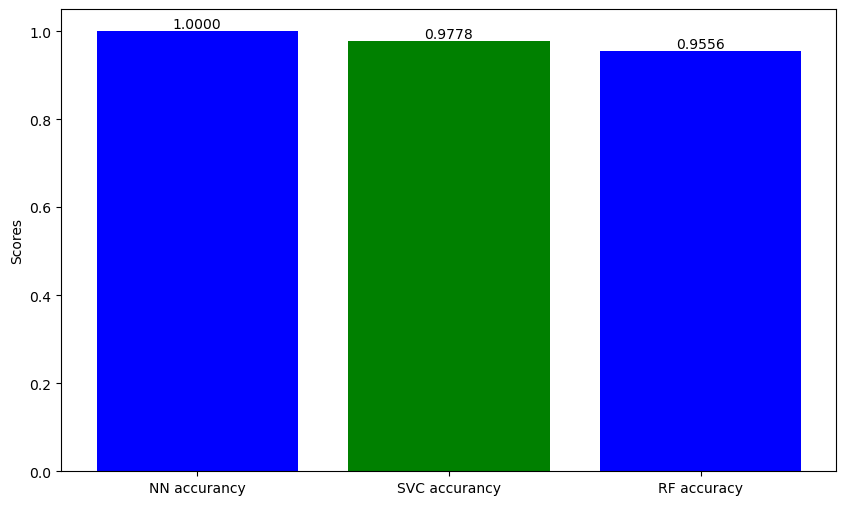

In [152]:
#сравнение точности моделей на данных x_test
metrics_k = ['NN accurancy', 'SVC accurancy','RF accuracy']
scores_k = [nn_accuracy, svc_accuracy,rf_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(metrics_k, scores_k, color=['blue', 'green'])
plt.ylabel('Scores')

for i, v in enumerate(scores_k):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.show()

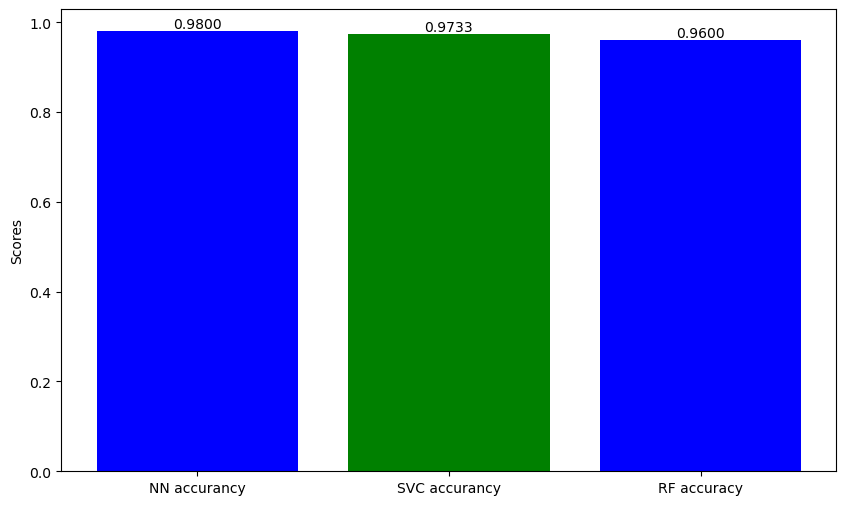

In [157]:
#сравнение точности моделей на полном наборе X
metrics_k = ['NN accurancy', 'SVC accurancy','RF accuracy']
scores_k = [f_nn_acc, f_svc_acc,f_rf_acc]

plt.figure(figsize=(10, 6))
plt.bar(metrics_k, scores_k, color=['blue', 'green'])
plt.ylabel('Scores')

for i, v in enumerate(scores_k):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.show()

В ходе работы были обучены три модели: нейронные сети, опорные вектора и рандомный лес. Нейронные сети показали более высокую точность, при этом на их обучение ушло больше времени, чем на другие две модели